In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/legal_text_classification.csv')

In [ ]:
df = df[['case_id','case_outcome','case_title','case_text']]
df.head()

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


In [ ]:
df['case_outcome'].value_counts()

cited            12219
referred to       4384
applied           2448
followed          2256
considered        1712
discussed         1024
distinguished      608
related            113
affirmed           113
approved           108
Name: case_outcome, dtype: int64

In [ ]:
def merge(x):
    if x == 'approved':
        return 'affirmed'
    elif x == 'considered':
        return 'discussed'
    elif x == 'related':
        return 'remove'
    elif (x == 'followed'):
        return 'referred to'
    else:
        return x

In [ ]:
df['case_outcome_merged'] = df['case_outcome'].apply(lambda x: merge(x))

In [ ]:
df = df[df['case_outcome_merged'] != 'remove']

In [ ]:
df['case_outcome_merged'].value_counts()

cited            12219
referred to       6640
discussed         2736
applied           2448
distinguished      608
affirmed           221
Name: case_outcome_merged, dtype: int64

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

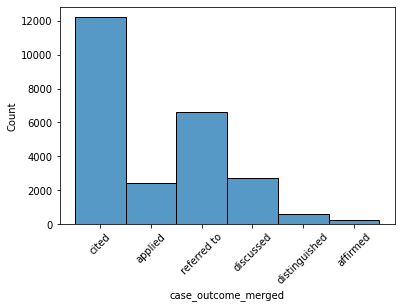

In [ ]:
#plt.figure(figsize = (15,6))
sns.histplot(data = df, x = 'case_outcome_merged')
import matplotlib.pyplot as plt
plt.xticks(rotation = 45)

In [ ]:
df_cited = df[df['case_outcome_merged'] == 'cited']
df_cited.reset_index(drop = True, inplace = True)

df_referred = df[df['case_outcome_merged'] == 'referred to']
df_referred.reset_index(drop = True, inplace = True)

In [ ]:
import random
df_cited_sample = df_cited.iloc[random.sample(range(0, 12219), 3000),:] 
df_referred_sample = df_referred.iloc[random.sample(range(0, 6640), 3000),:] 

In [ ]:
df_discussed = df[df['case_outcome_merged'] == 'discussed']
df_discussed.reset_index(drop = True, inplace = True)
df_applied = df[df['case_outcome_merged'] == 'applied']
df_applied.reset_index(drop = True, inplace = True)
df_distinguished = df[df['case_outcome_merged'] == 'distinguished']
df_distinguished.reset_index(drop = True, inplace = True)
df_affirmed = df[df['case_outcome_merged'] == 'affirmed']
df_affirmed.reset_index(drop = True, inplace = True)

In [ ]:
df_sample = pd.concat([df_cited_sample, df_referred_sample,df_discussed,df_applied,df_distinguished,df_affirmed], axis = 0)
df_sample.reset_index(drop = True, inplace = True)

In [ ]:
df_sample

,case_id,case_outcome,case_title,case_text,case_outcome_merged
0,Case2828,cited,Australian Broadcasting Corporation v Lenah Ga...,FKP submitted that the creation of intellectua...,cited
1,Case5298,cited,Morales v Minister for Immigration and Multicu...,this principle applies in relation to decision...,cited
2,Case7873,cited,Federal Commissioner of Taxation v Myer Empori...,"Zealand, by its counsel, has confirmed that, i...",cited
3,Case21181,cited,The 'Zeus' (1888) 13 PD 188,It is also be noted that in The 'Antonis P Lem...,cited
4,Case23346,cited,R v Industrial Court (S.A.); ex parte Mount Gu...,R v Industrial Court (S.A.); ex parte Mount Gu...,cited
...,...,...,...,...,...
12008,Case24069,affirmed,YBCF v Minister for Immigration and Citizenshi...,This is an application brought under s 44(1) o...,affirmed
12009,Case24507,affirmed,MZYBX v Minister for Immigration &amp; Citizen...,appeal is from a judgment of the Federal Magis...,affirmed
12010,Case24996,approved,Borrett v Repatriation Commission [2000] FCA 1829,This passage from Dixon [1999] FCA 582 ; 29 AA...,affirmed
12011,Case25002,approved,Dixon v Repatriation Commission [1999] FCA 582...,"Nevertheless, it is important not only to draw...",affirmed


([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

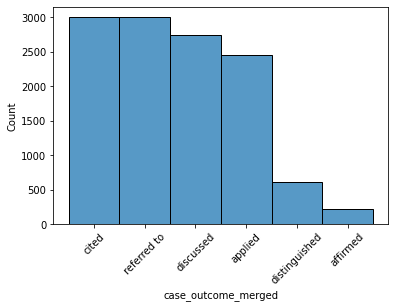

In [ ]:
sns.histplot(data = df_sample, x = 'case_outcome_merged')
plt.xticks(rotation = 45)

In [ ]:
df_sample['case_outcome_merged'].value_counts()

cited            3000
referred to      3000
discussed        2736
applied          2448
distinguished     608
affirmed          221
Name: case_outcome_merged, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
# from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")
df_sample=df_sample.dropna()
import re
df_sample['cleaned'] = df_sample['case_text'].str.replace('[^\w\s]','')
df_sample['cleaned'] = df_sample['cleaned'].str.replace('\d+','')
df_sample['cleaned'] = df_sample['cleaned'].str.findall('\w{4,}').str.join(' ')
#df['cleaned2'] = df['cleaned'].apply(lambda x: [stemmer.stem(y) for y in x])
X=df_sample['cleaned'] # Features
y=df_sample['case_outcome_merged']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

<ipython-input-62-8225ab11e4a3>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sample['cleaned'] = df_sample['case_text'].str.replace('[^\w\s]','')
<ipython-input-62-8225ab11e4a3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['cleaned'] = df_sample['case_text'].str.replace('[^\w\s]','')
<ipython-input-62-8225ab11e4a3>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sample['cleaned'] = df_sample['cleaned'].str.replace('\d+','')
<ipython-input-62-8225ab11e4a3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [ ]:
df_sample['cleaned']

0        submitted that creation intellectual property ...
1        this principle applies relation decisions Trib...
2        Zealand counsel confirmed that accordance with...
3        also noted that Antonis Lemos Lord Brandon exp...
4        Industrial Court parte Mount Gunson Mines afte...
                               ...                        
12008    This application brought under Administrative ...
12009    appeal from judgment Federal Magistrates Court...
12010    This passage from Dixon cited with approval Ta...
12011    Nevertheless important only draw line ensure t...
12012    Hall Repatriation Commission Gyles said that m...
Name: cleaned, Length: 11936, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
#Create a Gaussian Classifier
tfidf_vect = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english')
X_train_tfidf = tfidf_vect.fit_transform(X_train)
feature_names = np.array(tfidf_vect.get_feature_names())
X_test_tfidf = tfidf_vect.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
# model = CountVectorizer(ngram_range = (1, 3), stop_words='english')
# X_trainCV = model.fit_transform(X_train)
# X_testCV = model.transform(X_test)
# feature_namesCV = np.array(model.get_feature_names())
# max_scores = model.toarray().max(0).argsort()
# np.array(feature_namesCV)[max_scores[-20:]]

# sum_words = X_testCV.sum(axis=0) 
# words_freq = [(word, sum_words[0, idx]) for word, idx in model.vocabulary_.items()]
# words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
# df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
# df_sub = df.head(10)
# df_sub

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return ["".join([lemmatizer.lemmatize(w)]) for w in text]
  
df_sample['text_lemmatized'] = df_sample.cleaned.apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# indices = np.argsort(tfidf_vect.idf_)[::-1]
# features = tfidf_vect.get_feature_names()
# top_n = 10
# top_features = [features[i] for i in indices[:top_n]]
# print(top_features)

# sum_words = X_testCV.sum(axis=0) 
# words_freq = [(word, sum_words[0, idx]) for word, idx in model.vocabulary_.items()]
# words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
# df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
# df_sub = df.head(10)
# df_sub

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['hopper', 'twentysix', 'hamdan', 'halse', 'persistently', 'hale', 'halcyon', 'hair', 'hahnheuser', 'petranker']


,Word,Frequency
0,court,9137
1,case,5072
2,evidence,4307
3,legal,3898
4,decision,3823
5,tribunal,3763
6,applicant,3403
7,said,3349
8,privilege,3278
9,documents,2982


In [ ]:
# max_scores = X_test_tfidf.toarray().max(0).argsort()
# np.array(features)[max_scores[-20:]]


array(['sampling', 'policyholders', 'lever', 'jewellery', 'oaks', 'tort',
       'symbion', 'armitage', 'servier', 'patents', 'aporo', 'croker',
       'coles', 'rogers', 'bickfords', 'accountants', 'cfmeu', 'currency',
       'defamation', 'kabi'], dtype='<U36')

In [ ]:
sum_words = X_test_tfidf.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
df = pd.DataFrame(words_freq, columns=['Word', 'Frequency'])
df_sub = df.head(10)
df_sub

,Word,Frequency
0,court,143.749299
1,tribunal,124.061653
2,minister,93.873001
3,decision,89.997931
4,case,86.512648
5,applicant,79.762551
6,immigration,76.133929
7,evidence,76.007928
8,affairs,68.888392
9,application,67.561065


In [ ]:
top_n

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_tfidf,y_train)
y_pred=clf.predict(X_test_tfidf)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='micro'))

Accuracy: 0.4529723695227463
Precision: 0.4529723695227463


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# # number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 50)]

# random_grid = {
#  'n_estimators': n_estimators
#  }
# # Random search of parameters
# rfc_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the model
# rfc_random.fit(X_train_tfidf, y_train)
# # print results
# print(rfc_random.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train_tfidf,y_train)
y_pred=clf.predict(X_test_tfidf)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='micro'))

Accuracy: 0.4412503488696623
Precision: 0.4412503488696623


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train_tfidf,y_train)
y_pred=clf.predict(X_test_tfidf)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='micro'))

Accuracy: 0.46664806028467765
Precision: 0.46664806028467765


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
X=df_sample['cleaned']
labelEncoder = LabelEncoder()
labelEncoder.fit(df_sample['case_outcome_merged'])
df_sample['Ylabel'] = labelEncoder.transform(df_sample['case_outcome_merged'])
Y = df_sample['Ylabel']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=123)
tfidf = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
modelSVM = svm.SVC(kernel='poly')
modelSVM.fit(X_train_tfidf, y_train)
y_predSVM = modelSVM.predict(X_test_tfidf)
print("Accuracy:",metrics.accuracy_score(y_test, y_predSVM))
print("Precision:",metrics.precision_score(y_test, y_predSVM,average='micro'))

<ipython-input-89-04dcc0acfee4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Ylabel'] = labelEncoder.transform(df_sample['case_outcome_merged'])


In [ ]:
df_sample['totalwords'] = df_sample['cleaned'].str.split().str.len()
df_sample['totalwords'].sum(axis = 0, skipna = True)

3132261

In [ ]:
df_sample['totalwords']

0          81
1         389
2        1080
3         121
4         102
         ... 
12008     225
12009     634
12010     224
12011     475
12012     212
Name: totalwords, Length: 11938, dtype: int64

In [ ]:
!pip install transformers
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-base-uncased")
model = AutoModel.from_pretrained("nlpaueb/legal-bert-base-uncased")
model = svm.SVC(kernel='poly')
model.fit(X_train_tfidf, y_train)
y_predBert = model.predict(X_test_tfidf)
print("Accuracy:",metrics.accuracy_score(y_test, y_predBert))
print("Precision:",metrics.precision_score(y_test, y_predBert,average='micro'))